## Neural Networks | TensorFlow | Forest-fire_data
#### Predict the burned area of forest fires with neural networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df=pd.read_csv('forestfires (1).csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [4]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### No missing values found

In [7]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

### Data Visualization

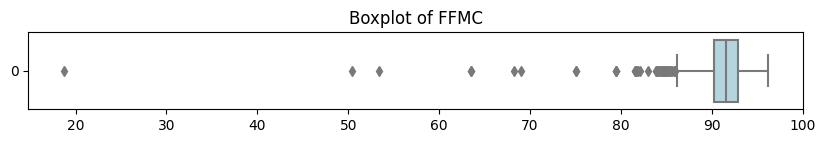

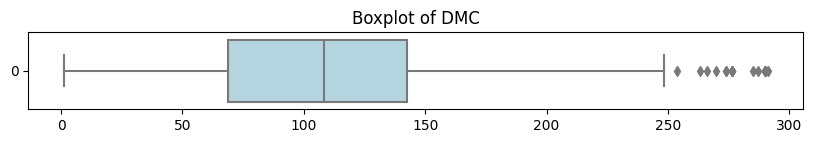

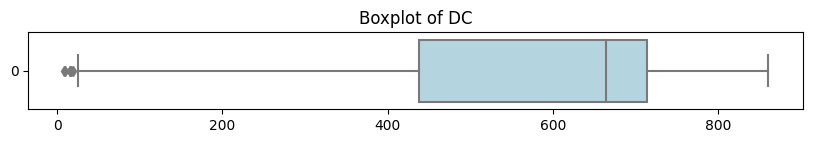

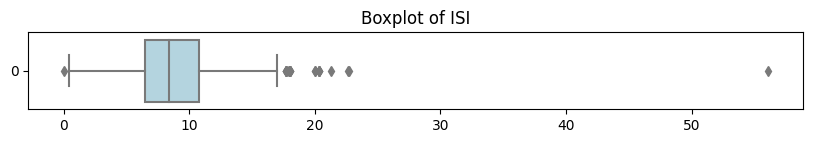

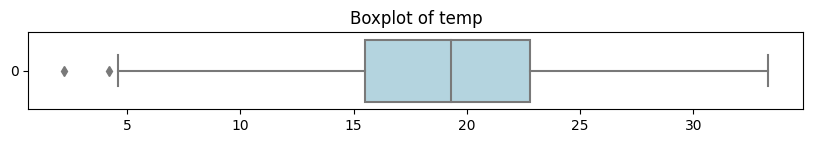

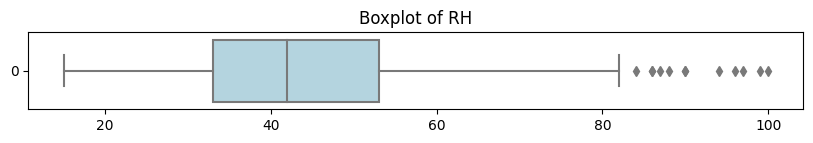

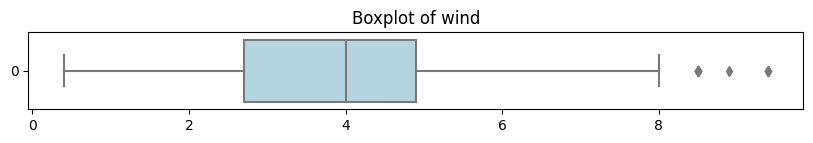

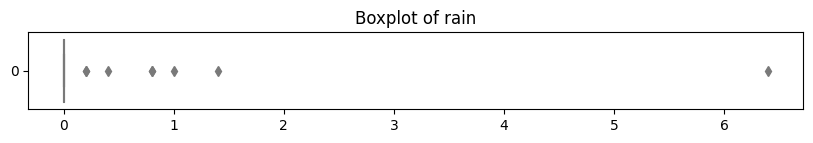

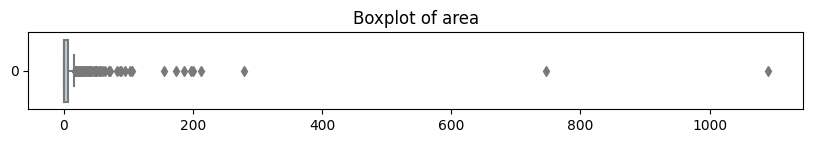

In [8]:
c=list(df.columns)
for column in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']:
    plt.figure(figsize=(10,1))
    sns.boxplot(df[column],orient='h',color='lightblue')
    plt.title('Boxplot of '+str(column))

<b>Most of the continous variables contain outliers.. We may go for normalization to reduce the effect of these

<Axes: xlabel='count', ylabel='day'>

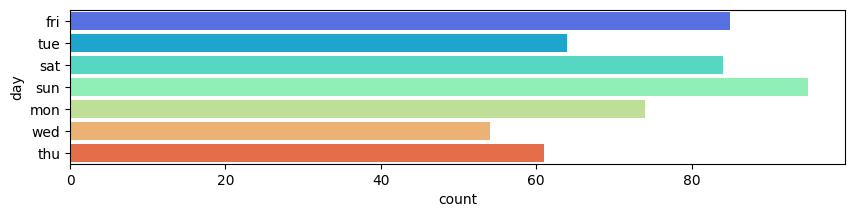

In [9]:
plt.figure(figsize=(10,2))
sns.countplot(y=df['day'],palette='rainbow')

<b>Forest fires are happening on sundays thean other days

<Axes: xlabel='count', ylabel='month'>

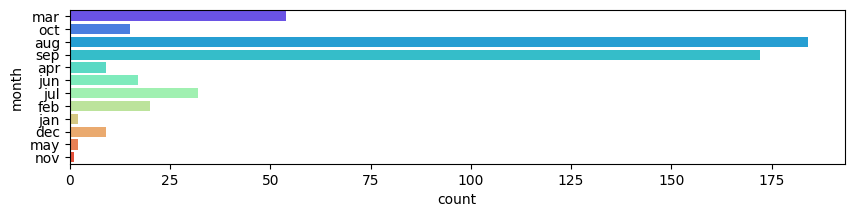

In [10]:
plt.figure(figsize=(10,2))
sns.countplot(y=df['month'],palette='rainbow')

<b>Septemper and August are reported as months of most forestfires

<b> Distribution of target variable

<b>Distribution of continuous variables

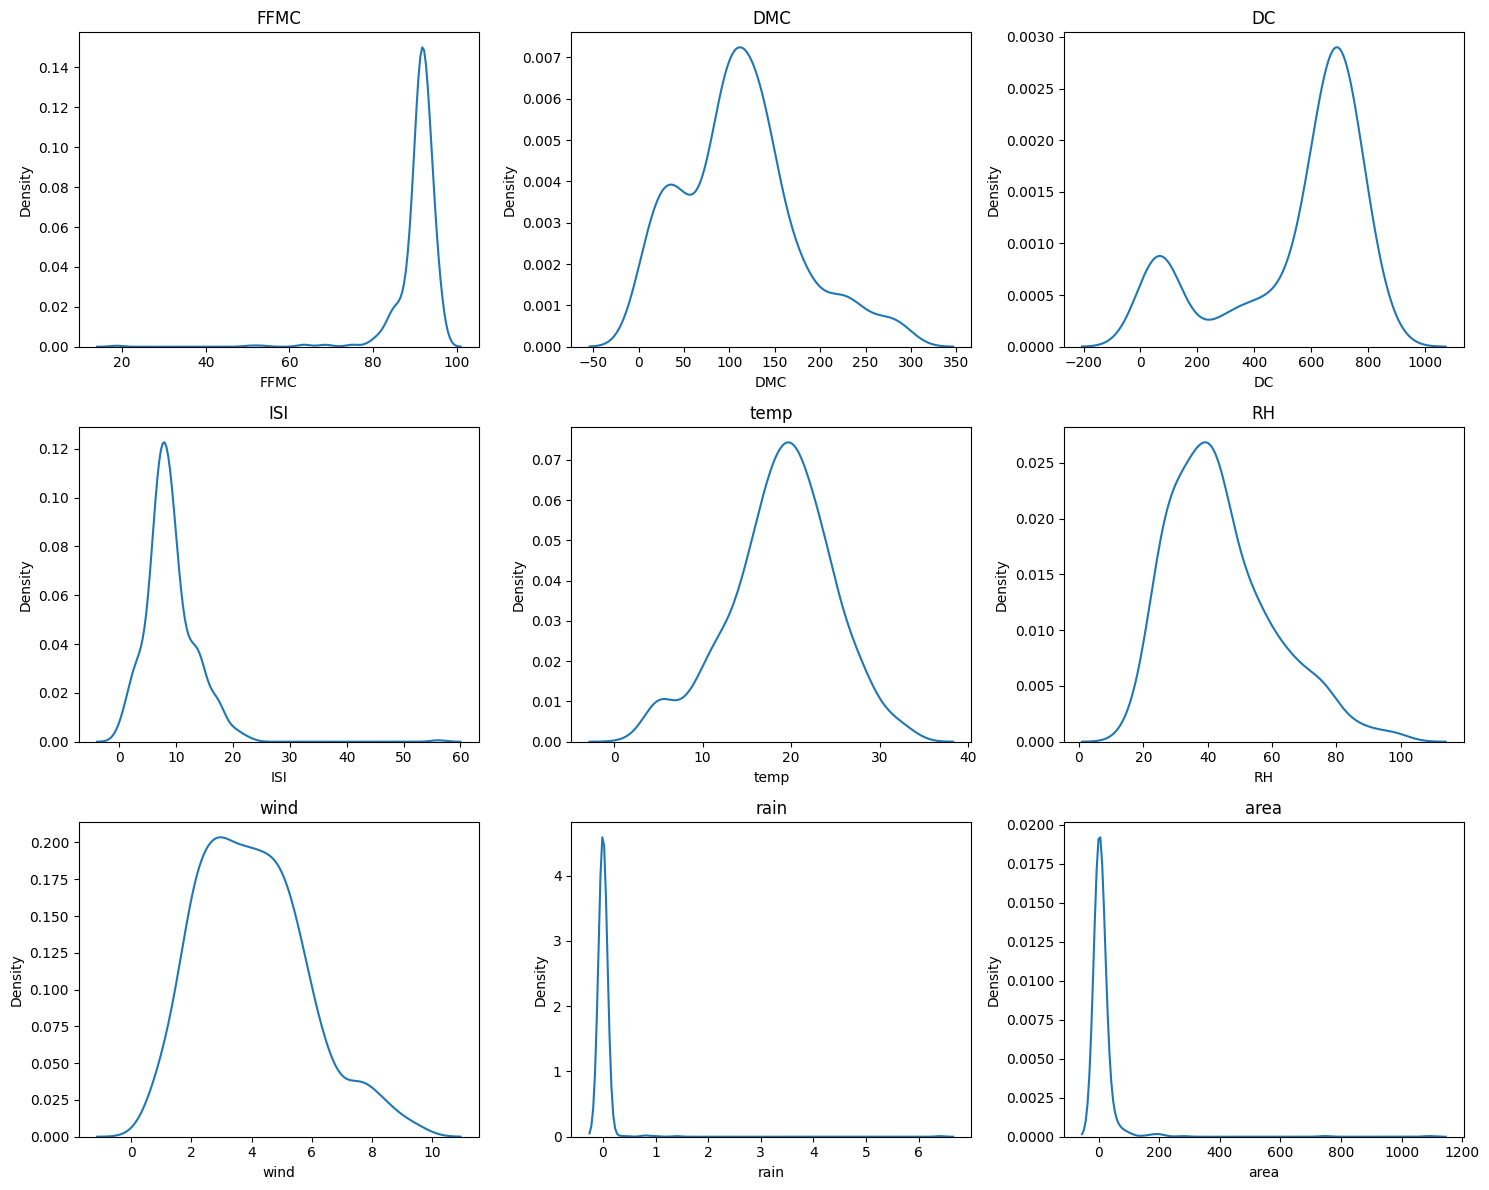

In [11]:
col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

n_rows = 3  # Number of rows
n_cols = 3  # Number of columns
z = 0
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 12))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        if z < len(col):
            sns.kdeplot(data=df[col[z]], ax=ax)
            ax.set_title(col[z])
            z += 1
plt.tight_layout()
plt.show()


<b>Most of the continuous features are skewed.

<Axes: >

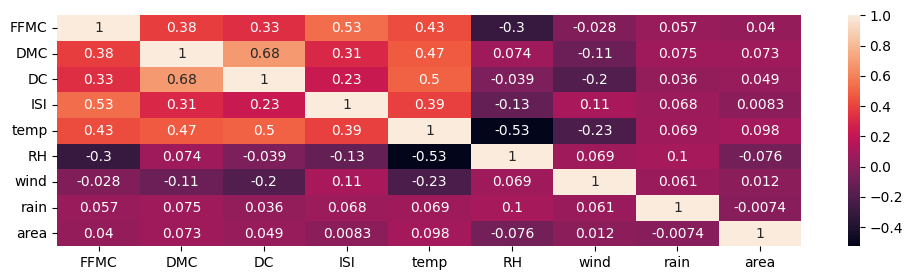

In [12]:
plt.figure(figsize=(12,3))
sns.heatmap(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']].corr(),annot=True)

<b>Heatmap looks fine .There is not much collinearity between variables other than DMC & DC. Lets drop DMC

<br><b>Distribution of Target variable

<Axes: xlabel='count', ylabel='size_category'>

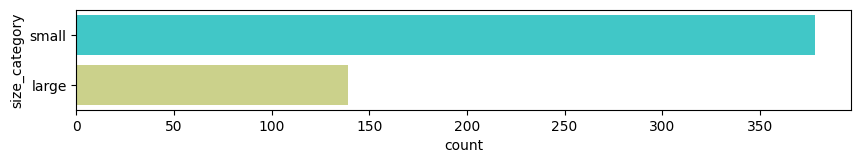

In [13]:
plt.figure(figsize=(10,1.3))
sns.countplot(y=df['size_category'],palette='rainbow')

<b>Small forest fires are occuring more than two times of larger ones

### Data Preprocessing

<br><b>Drop redundant columns

<b>Drop month and day colums since we already have encoded it also DMC since its collinearity with  MC is .68

In [14]:
df1=df.copy()
df1.drop(['month','day','DMC'],axis=1,inplace=True)

<b>MinMax Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
for column in ['FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']:
    df1[column]=scaler.fit_transform(df[[column]])
    
df1.head()    
    

,FFMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,0,...,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,0,...,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,0,...,0,0,0,0,1,0,0,0,0,small


<b>Label encode the target

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lencoder=LabelEncoder()
df1['size_category']=lencoder.fit_transform(df1[['size_category']]).ravel()

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
df1.iloc[:,-1].head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

<b>Split the data into Features and target

In [20]:
X_train=df1.iloc[:,0:-1]
y_train=df1.iloc[:,-1]

X_train.tail()

,FFMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
512,0.811613,0.771315,0.033868,0.823151,0.200000,0.255556,0.0,0.005904,0,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.771315,0.033868,0.633441,0.658824,0.600000,0.0,0.049769,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.771315,0.033868,0.610932,0.647059,0.700000,0.0,0.010231,0,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.711622,0.201426,0.752412,0.317647,0.400000,0.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
516,0.784516,0.115867,0.019608,0.308682,0.188235,0.455556,0.0,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0


## Sequential Neural Network with Keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense

<b>Hyperparameter Selection<br>
<br>n_layers : considering 2 layers since the problem is less complex<br>
<br>activation_function : 'relu' for input and hidden layers, 'sigmoid' for output layer since our classification is binary<br>
    <br>dorpout : default<br> 
    <br>learning rate :.01 <br>
    <br>loss : binary_crossentropy<br>
    <br>optimizer : adam<br>

<b>Define and compile the keras model

In [22]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [143]:
from keras.optimizers import Adam
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

In [105]:
def seq_model():
    model=Sequential()
    model.add(Dense(27,input_dim=27,activation='relu')) 
    model.add(Dense(14,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

<b>Fit to the dataset

In [109]:
history = seq_model().fit(X_train,y_train,epochs=150,batch_size=10,validation_split=.3) 


Epoch 1/150
37/37 [==============================] - 1s 9ms/step - loss: 0.6711 - accuracy: 0.6427 - val_loss: 0.6647 - val_accuracy: 0.6731
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.7562 - val_loss: 0.6401 - val_accuracy: 0.6731
Epoch 3/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7562 - val_loss: 0.6449 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7562 - val_loss: 0.6530 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.7562 - val_loss: 0.6625 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7562 - val_loss: 0.6605 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7562 - val_loss: 0.6712 - val_accuracy: 0.6731
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.8643 - val_loss: 0.8424 - val_accuracy: 0.6859
Epoch 60/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.8615 - val_loss: 0.8373 - val_accuracy: 0.6987
Epoch 61/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8670 - val_loss: 0.8569 - val_accuracy: 0.7115
Epoch 62/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8781 - val_loss: 0.8496 - val_accuracy: 0.7051
Epoch 63/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8615 - val_loss: 0.8446 - val_accuracy: 0.7051
Epoch 64/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8643 - val_loss: 0.9006 - val_accuracy: 0.6923
Epoch 65/150
37/37 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8643 - val_loss: 0.8395 - val_accuracy: 0.6923
Epoch 

<b> With epochs=150 and batch_size=10 we obtain maximum accuracy of .977 and val_accuracy of 0.7. Reduced validation accuracy maybe because of the small size of dataset

<b>Grid search for ptimum epochs and batch_size

In [1]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

model1=KerasClassifier(seq_model)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=1)
grid_result = grid.fit(X_train,y_train)

print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))


NameError: name 'seq_model' is not defined

In [31]:
grid_result.best_score_,grid_result.best_params_

(0.8702763256161316, {'batch_size': 10, 'epochs': 200})

### Sequential NN model with optimum parameters

In [116]:
def optimum_model():
    opt_model=Sequential()
    opt_model.add(Dense(27,input_dim=27,activation='relu')) 
    opt_model.add(Dense(14,activation='relu'))
    opt_model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    opt_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return opt_model


In [121]:
opt_model=optimum_model()
history_= opt_model.fit(X_train, y_train, validation_split=0.3, batch_size = 10, epochs = 200,verbose=1)

Epoch 1/200
37/37 [==============================] - 1s 8ms/step - loss: 0.6828 - accuracy: 0.5706 - val_loss: 0.6428 - val_accuracy: 0.6731
Epoch 2/200
37/37 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.7535 - val_loss: 0.6282 - val_accuracy: 0.6731
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7562 - val_loss: 0.6388 - val_accuracy: 0.6731
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 0.5472 - accuracy: 0.7562 - val_loss: 0.6529 - val_accuracy: 0.6731
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7562 - val_loss: 0.6505 - val_accuracy: 0.6731
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7562 - val_loss: 0.6633 - val_accuracy: 0.6731
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7562 - val_loss: 0.6636 - val_accuracy: 0.6731
Epoch 8/200
3

Epoch 59/200
37/37 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8504 - val_loss: 0.8137 - val_accuracy: 0.7179
Epoch 60/200
37/37 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8338 - val_loss: 0.8118 - val_accuracy: 0.7115
Epoch 61/200
37/37 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.8532 - val_loss: 0.8230 - val_accuracy: 0.7115
Epoch 62/200
37/37 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8338 - val_loss: 0.7645 - val_accuracy: 0.6859
Epoch 63/200
37/37 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.8532 - val_loss: 0.7874 - val_accuracy: 0.7179
Epoch 64/200
37/37 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8615 - val_loss: 0.8137 - val_accuracy: 0.7179
Epoch 65/200
37/37 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8532 - val_loss: 0.7969 - val_accuracy: 0.7179
Epoch 

37/37 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9695 - val_loss: 1.1643 - val_accuracy: 0.7885
Epoch 174/200
37/37 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9668 - val_loss: 1.1621 - val_accuracy: 0.8077
Epoch 175/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9723 - val_loss: 1.2029 - val_accuracy: 0.8141
Epoch 176/200
37/37 [==============================] - 0s 4ms/step - loss: 0.1085 - accuracy: 0.9612 - val_loss: 1.2199 - val_accuracy: 0.8141
Epoch 177/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9723 - val_loss: 1.1856 - val_accuracy: 0.8269
Epoch 178/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9695 - val_loss: 1.1849 - val_accuracy: 0.8077
Epoch 179/200
37/37 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9695 - val_loss: 1.1886 - val_accuracy: 0.8141
Epoch 180/200

In [123]:
history_.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

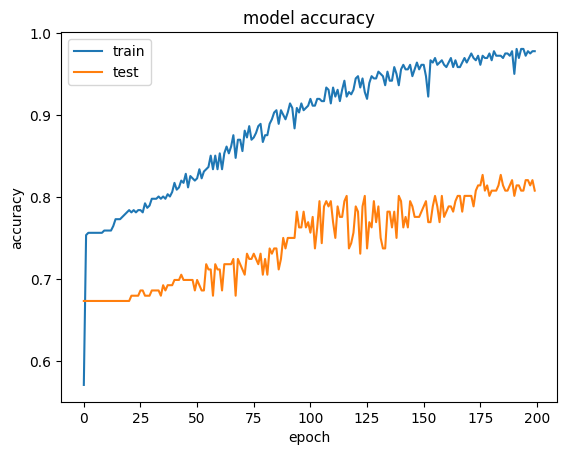

In [124]:
import matplotlib.pyplot as plt
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

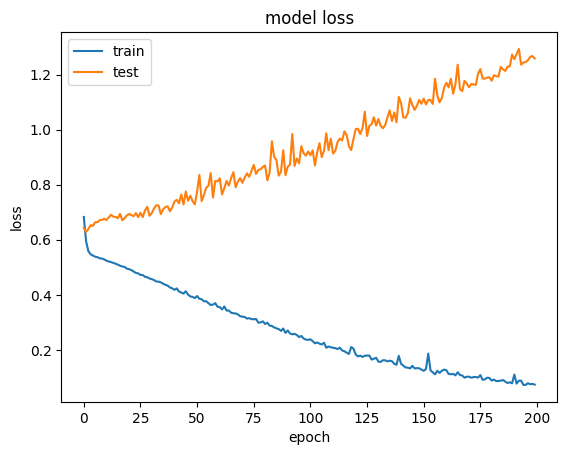

In [126]:
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Observation

**The model test loss is incresing drastically with respect to epochs  .Its a sign of overfitting.
The model is not learnig from the given dataset properly since it is quite small in size**

## Hyperparameter Tuning | KerasTuner

In [268]:
X=X_train.copy()
y=y_train.copy()
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=.2,random_state=100)

In [269]:
def build_model(hp):
    model=Sequential()
    for i in range(hp.Int('num_layers',2,15)):
        model.add(Dense(units=hp.Int('unuts_'+str(i),min_value=8,max_value=512,step=8),activation='relu'))
        model.add(Dense(1,activation='sigmoid'))
        model.compile(optimizer=Adam(hp.Choice('learning_rate',[1e-2])),
                      loss='binary_crossentropy',metrics=['accuracy'])
    return model

<b>Finding optimized hyperparameters using Keras tuner

In [171]:
from scikeras.wrappers import KerasClassifier
from keras_tuner.tuners import RandomSearch
tuner=RandomSearch(build_model,objective='val_accuracy',
                   max_trials=10,
                   executions_per_trial=5,
                   directory='project_',
                   project_name='forest_fires__')

In [172]:
tuner.search(X_train1,y_train1,
             epochs=10,validation_data=(X_test1,y_test1))

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.7403846383094788

Best val_accuracy So Far: 0.7480769276618957
Total elapsed time: 00h 03m 10s
INFO:tensorflow:Oracle triggered exit


In [173]:
tuner.results_summary()

Results summary
Results in project_\forest_fires__
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
num_layers: 2
unuts_0: 360
learning_rate: 0.01
unuts_1: 472
unuts_2: 168
unuts_3: 408
unuts_4: 480
unuts_5: 160
unuts_6: 376
unuts_7: 280
unuts_8: 248
unuts_9: 296
unuts_10: 312
unuts_11: 192
unuts_12: 432
unuts_13: 496
Score: 0.7480769276618957

Trial 00 summary
Hyperparameters:
num_layers: 3
unuts_0: 392
learning_rate: 0.01
unuts_1: 296
unuts_2: 8
Score: 0.7403846383094788

Trial 01 summary
Hyperparameters:
num_layers: 13
unuts_0: 32
learning_rate: 0.01
unuts_1: 448
unuts_2: 256
unuts_3: 8
unuts_4: 8
unuts_5: 8
unuts_6: 8
unuts_7: 8
unuts_8: 8
unuts_9: 8
unuts_10: 8
unuts_11: 8
unuts_12: 8
Score: 0.7403846383094788

Trial 02 summary
Hyperparameters:
num_layers: 4
unuts_0: 376
learning_rate: 0.01
unuts_1: 208
unuts_2: 312
unuts_3: 96
unuts_4: 24
unuts_5: 384
unuts_6: 16
unuts_7: 496
unuts_8: 16
unuts_9: 136
unuts_10: 112
unuts_11:

As per tuning we get below summary

### New model and prediction

In [260]:
import tensorflow as tf
np.random.seed(37)
tf.random.set_seed(89)

In [272]:
model_new=Sequential()
model_new.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
model_new.add(Dense(128,activation='relu'))
model_new.add(Dense(128,activation='relu')) 
model_new.add(Dense(1,activation='sigmoid'))
adam=Adam(learning_rate=0.01)

model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [277]:
history_new=model_new.fit(X,y,epochs=10,batch_size=16,validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8475 - val_loss: 0.8764 - val_accuracy: 0.7692
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8329 - val_loss: 0.8608 - val_accuracy: 0.7788
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8499 - val_loss: 0.8685 - val_accuracy: 0.7788
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.8450 - val_loss: 1.0804 - val_accuracy: 0.7308
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2894 - accuracy: 0.8838 - val_loss: 0.9110 - val_accuracy: 0.7596
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.8935 - val_loss: 0.9917 - val_accuracy: 0.7788
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8789 - val_loss: 0.9662 - val_accuracy: 0.7308
Epoch 8/10
26/26 [==

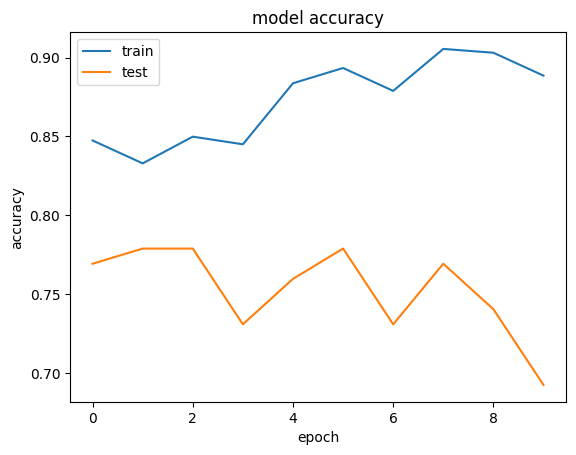

In [278]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

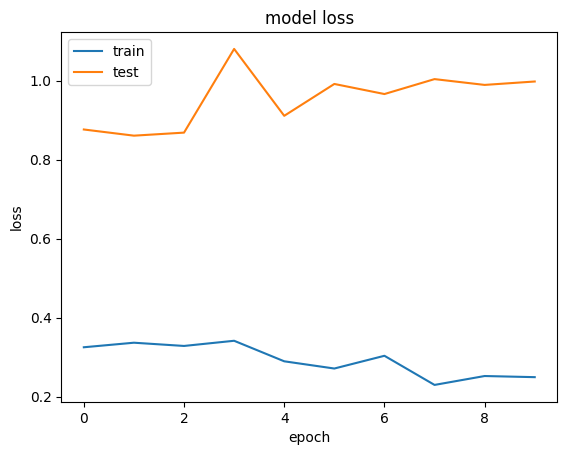

In [279]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model loss is converging after 5th epoch. So with 10 epochs we have obtained a better model compared to former one**

In [280]:
y_pred=model_new.predict(X_test1)

4/4 [==============================] - 0s 3ms/step


In [291]:
y_pred[1:10]

array([[0.2621647 ],
       [0.9096545 ],
       [0.8917837 ],
       [0.6419593 ],
       [0.40531245],
       [0.0239287 ],
       [0.99998736],
       [0.09412231],
       [0.99999976]], dtype=float32)

**We get the output layer values are between 0 and 1 since we are using sigmoid function which returns probability. we need to convet this to binary considering threshold as .5**

In [285]:
def probToBinary(Prob):
    if Prob >= 0.5:
        return 1
    else:
        return 0

In [286]:
compare=pd.DataFrame({"test":y_test1,'pred':y_pred.flatten()})

In [287]:
compare['pred']=compare['pred'].apply(probToBinary)
compare.head()

,test,pred
217,0,0
260,0,0
142,1,1
152,1,1
255,1,1


<b>Predictive accuracy

In [288]:
np.mean(compare.test==compare.pred)

0.8846153846153846

### Evaluation

In [292]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [293]:
confusion_matrix(compare.test,compare.pred)

array([[22,  5],
       [ 7, 70]], dtype=int64)

In [295]:
print(classification_report(compare.test,compare.pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.93      0.91      0.92        77

    accuracy                           0.88       104
   macro avg       0.85      0.86      0.85       104
weighted avg       0.89      0.88      0.89       104



**With the imbalance in the data considered we got a good NN model with acceptale accuracy,prediction and f1 score**

Text(0, 0.5, 'True Positive Rate')

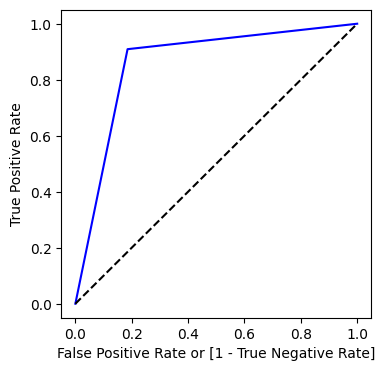

In [298]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(compare.test,compare.pred)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [299]:
 print('Area Under the Curve', roc_auc_score(compare.test, compare.pred))

Area Under the Curve 0.861952861952862


## Summary

<b>We developed a sequential model with,

    1. 4 hidden layers of 128 neurons each with 'relu' activation function
    2. Learning rate of .01
    3. Prediction accuracy of .8846
    4. AUC =.862
    5. Majority class f1 score of .92 and minority class f1 score of 79.
    
<b>classification report of best model is given below
    

In [300]:
print(classification_report(compare.test,compare.pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.93      0.91      0.92        77

    accuracy                           0.88       104
   macro avg       0.85      0.86      0.85       104
weighted avg       0.89      0.88      0.89       104

